In [4]:
import numpy as np
import os
import dill as pickle
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.spectroscopy as spec
import analysis.plotting as plotting

In [5]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
q3 = Qubit(q3_dict, readout_dict)
q4 = Qubit(q4_dict, readout_dict)
q5 = Qubit(q5_dict, readout_dict)
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")
bnc.set_bnc_output(readout.RO_LO,power_dBm=readout.RO_LO_pwr, bnc_addr=bnc_address['target_bnc_black'])
bnc.set_bnc_output(general_vals_dict['TWPA_freq'], power_dBm=general_vals_dict['TWPA_pwr'], bnc_addr=bnc_address['agilent_function_generator'])
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=bnc_address['target_bnc_6']
)



Qubit(RO_IF=None, ro_amp=0.6, ge_ssm=-0.114, qubit_thr=[-10000, -600], ro_dur=4000, ef_ssm=-0.186, IQ_angle=205, ef_amp=1, ro_freq=6.72742, ef_time=77, ge_time=66.625, ge_amp=0.5, ROIF=0.10272000000000059, qubit_id=q1, RO_LO=6.6247, RO_LO_pwr=16)
Qubit(RO_IF=None, ro_amp=0.4, ge_ssm=-0.154, qubit_thr=[-10000, 1900], ro_dur=4000, ef_ssm=-0.224, IQ_angle=85, ef_amp=1, ro_freq=6.6556, ef_time=None, ge_time=40.15374412400174, ge_amp=1, ROIF=0.030899999999999928, qubit_id=q2, RO_LO=6.6247, RO_LO_pwr=16)


writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 101
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 101
Records per pattern: 500
Buffers per acquistion: 17
DAQ samples per pattern: 8192
0, No error
Capturing 17 buffers. Press <enter> to abort
Capture completed in 7.597030 sec
Captured 17 buffers (2.237717 buffers per sec)
Captured 52224 records (6874.265191 records per sec)
Transferred 855638016 bytes (112627960.882463 bytes per sec)


<Figure size 800x800 with 0 Axes>

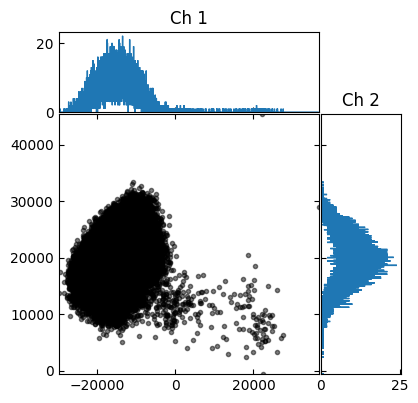

<Figure size 800x800 with 0 Axes>

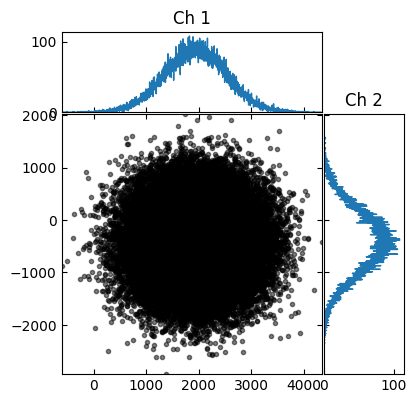

In [ ]:
num_steps =101
f1=-.15
f2=-.05

reps = 500
general_vals_dict["wx_amps"]=[1.0, 1, 0.5, .4]
spec.spectroscopy_ge(
    q3,
    general_vals_dict,
    ssm_start=f1,
    ssm_stop=f2,
    spec_amp=0.1,
    sweep_time=10000,
    verbose=False,
)
wx.wx_set_and_amplitude_and_offset(amp=general_vals_dict["wx_amps"],
                                    offset=general_vals_dict["wx_offs"])
# Acquire the raw IQ data
values = daq.run_daq_het_2q(q1, q2,
                            num_patterns=num_steps,
                            num_records_per_pattern=reps,
                            verbose=True)

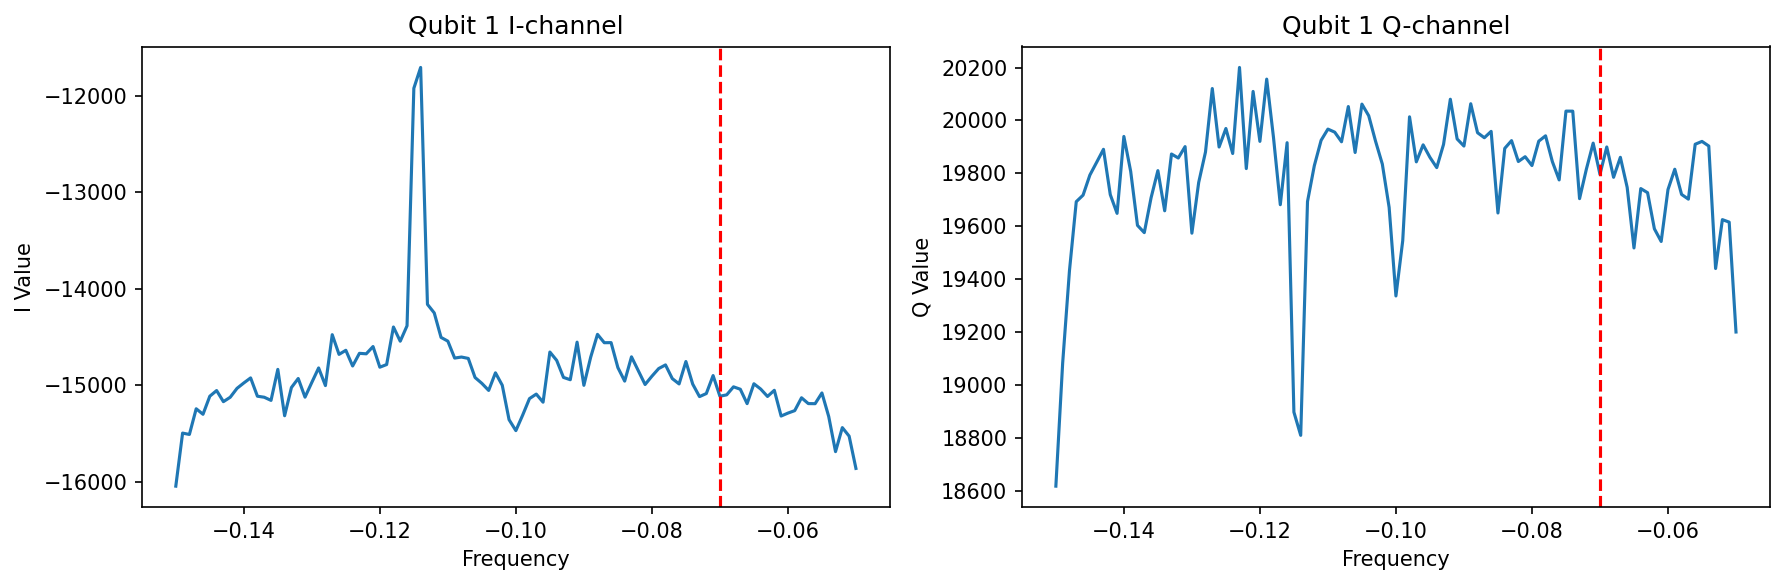

-0.06999999999999999

In [14]:
freq_list = np.linspace(f1, f2, num_steps)
dat = plotting.get_IQ_averages(values)
freq = freq_list[np.argmin(dat['I2'])]
plotting.spectroscopy_plot(freq_list, values, [freq,freq], qubit_num=1)
freq